In [1]:
!pip install pandas numpy scikit-learn matplotlib seaborn


[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib  # To save the trained model

In [4]:
import pandas as pd

# Load the dataset
train_path = r"D:\Advanced_IDPS\NSL-KDD-2025\KDDTrain+.txt"  # Closing quote added
test_path = r"D:\Advanced_IDPS\NSL-KDD-2025\KDDTest+.txt"    # Closing quote added

# Column names (NSL-KDD has 42 features + 1 label)
columns = ["duration", "protocol_type", "service", "flag", "src_bytes", "dst_bytes",
           "land", "wrong_fragment", "urgent", "hot", "num_failed_logins", "logged_in",
           "num_compromised", "root_shell", "su_attempted", "num_root", "num_file_creations",
           "num_shells", "num_access_files", "num_outbound_cmds", "is_host_login",
           "is_guest_login", "count", "srv_count", "serror_rate", "srv_serror_rate",
           "rerror_rate", "srv_rerror_rate", "same_srv_rate", "diff_srv_rate",
           "srv_diff_host_rate", "dst_host_count", "dst_host_srv_count",
           "dst_host_same_srv_rate", "dst_host_diff_srv_rate", "dst_host_same_src_port_rate",
           "dst_host_srv_diff_host_rate", "dst_host_serror_rate", "dst_host_srv_serror_rate",
           "dst_host_rerror_rate", "dst_host_srv_rerror_rate", "label", "difficulty"]

# Read CSV files
train_df = pd.read_csv(train_path, names=columns)
test_df = pd.read_csv(test_path, names=columns)

# Drop the "difficulty" column
train_df.drop(columns=["difficulty"], axis=1, inplace=True)
test_df.drop(columns=["difficulty"], axis=1, inplace=True)

print("Training data shape:", train_df.shape)
print("Testing data shape:", test_df.shape)


Training data shape: (125973, 42)
Testing data shape: (22544, 42)


In [5]:
# Define attack types
attack_types = {
    'normal': 'normal',
    'neptune': 'attack', 'warezclient': 'attack', 'ipsweep': 'attack',
    'portsweep': 'attack', 'teardrop': 'attack', 'nmap': 'attack',
    'satan': 'attack', 'smurf': 'attack', 'pod': 'attack',
    'back': 'attack', 'guess_passwd': 'attack', 'ftp_write': 'attack',
    'multihop': 'attack', 'rootkit': 'attack', 'buffer_overflow': 'attack',
    'imap': 'attack', 'phf': 'attack', 'loadmodule': 'attack',
    'spy': 'attack', 'perl': 'attack', 'saint': 'attack',
    'mscan': 'attack', 'apache2': 'attack', 'snmpgetattack': 'attack',
    'processtable': 'attack', 'httptunnel': 'attack', 'ps': 'attack',
    'snmpguess': 'attack', 'mailbomb': 'attack', 'named': 'attack',
    'sendmail': 'attack', 'xterm': 'attack', 'worm': 'attack',
    'xlock': 'attack', 'xsnoop': 'attack', 'sqlattack': 'attack'
}

# Map labels to 'attack' and 'normal'
train_df["label"] = train_df["label"].map(attack_types)
test_df["label"] = test_df["label"].map(attack_types)

# Convert categorical labels to binary (0 = normal, 1 = attack)
le = LabelEncoder()
train_df["label"] = le.fit_transform(train_df["label"])
test_df["label"] = le.transform(test_df["label"])

In [6]:
# Encode categorical features
categorical_cols = ["protocol_type", "service", "flag"]
train_df = pd.get_dummies(train_df, columns=categorical_cols)
test_df = pd.get_dummies(test_df, columns=categorical_cols)

# Align columns to match both datasets
train_df, test_df = train_df.align(test_df, join='inner', axis=1)

print("Data preprocessing completed!")

Data preprocessing completed!


In [7]:
X_train = train_df.drop(columns=["label"])
y_train = train_df["label"]
X_test = test_df.drop(columns=["label"])
y_test = test_df["label"]

# Normalize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [11]:
import os
import joblib
from sklearn.ensemble import RandomForestClassifier

# Define the directory where you want to save the model
save_dir = r"D:\Advanced_IDPS\Models"

# Ensure the directory exists
os.makedirs(save_dir, exist_ok=True)

# Define the full path for the model file
model_filename = os.path.join(save_dir, "idps_model.pkl")

# Train the model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Save the trained model
joblib.dump(model, model_filename)

print(f"Model training complete and saved at: {model_filename}")

Model training complete and saved at: D:\Advanced_IDPS\Models\idps_model.pkl


Model Accuracy: 0.7711586231369766

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.67      0.79     11880
           1       0.66      0.97      0.79      9711
           2       0.67      0.00      0.00       953

    accuracy                           0.77     22544
   macro avg       0.76      0.55      0.53     22544
weighted avg       0.82      0.77      0.75     22544



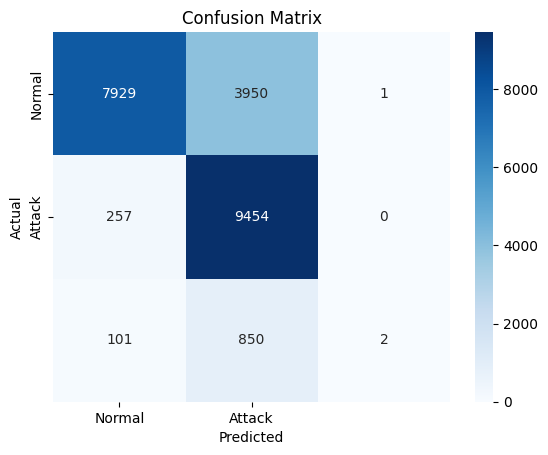

In [10]:
y_pred = model.predict(X_test)

# Print accuracy and classification report
accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Plot confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Normal", "Attack"], yticklabels=["Normal", "Attack"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()